In [220]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
data = fits.open('speckledata.fits')[2].data

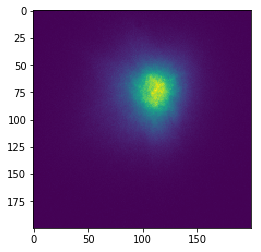

In [221]:
data
#plt.imshow(data[4])
mean=0
n=1
for i in range (len(data)):
    mean+=data[i]
    n= n+1
mean=mean/n
plt.imshow(mean)
plt.savefig('mean.png')
#xdata
#plt.plot(data[1::2],data[2::2])

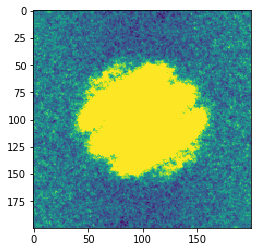

In [222]:
from scipy.ndimage import rotate

fourier = np.abs(np.fft.fft2(data))**2
fourier = np.fft.fftshift(fourier)
foursum = 0
for i in range (len(fourier)):
    foursum+=fourier[i]
plt.imshow(foursum,vmax=10**10)
plt.savefig('fourier.png')


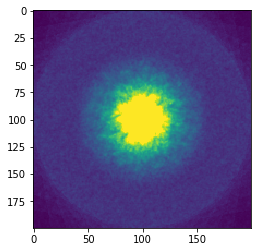

In [317]:
df=[]
fourier_rot=fourier.copy()
for i in range (100):
    angle=i*10
    fourier_rot[i]=rotate(fourier_rot[i], angle, reshape=False )
    df.append(fourier_rot[i])
    

rotaver = 0    
for i in range (len(df)):
    rotaver+=df[i]
    n = n+1
rotaver=rotaver/n
plt.imshow(rotaver, vmax=10**8)
plt.savefig('rotaver.png')


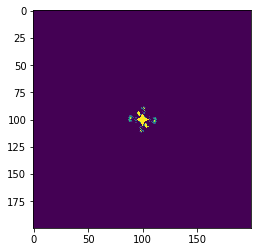

In [342]:
final = np.divide(foursum,rotaver)
final[np.abs(final) >= 6666] = 0
final = np.abs(np.fft.ifft2(final))
final = np.fft.fftshift(final)

plt.imshow(final, vmin=6.6, vmax = 13)
plt.savefig('binary.png')